In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import scipy.integrate
from matplotlib.pyplot import figure

In [2]:
import sys
np.set_printoptions(threshold=sys.maxsize)

### Problem 1 

In [3]:
# Define the function
def rhsfunc(x, y, ep):
    f1 = y[1]
    f2 = (x**2 - ep) * y[0]
    
    return np.array([f1,f2])

In [4]:
# Define some constants 
K = 1
L = 4
ep_start = 0
tol = 10**(-6) 

xp = [-L, L]
x_evals = np.linspace(-L,L,20*L+1) 

In [5]:
ep = ep_start
dep = K/100 

In [6]:
# Define our initial conditions 
y0 = np.array([1,((K*L**2)-ep)**.5])

In [7]:
A6 = np.array([])
A = {}

for modes in range(5):
    ep = ep_start
    dep = K/100
    
    
    for j in range(1000): # using for loop to make sure it stops. 
        sol = scipy.integrate.solve_ivp(lambda x,y: rhsfunc(x,y,ep), xp, y0, t_eval = x_evals)
        y_sol = sol.y[0,:] # f1 
        y_sol_dx = sol.y[1,:] #f2 
        
        # Normalize eigenfunction
        y_sol_norm = y_sol/(np.sqrt(scipy.integrate.trapz(y_sol**2, x_evals)))

        if np.abs(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) < tol:
#             print('We got the eigenvalue:', ep)
            A6 = np.append(A6, ep)
            break 

        if (-1)**(modes)*(y_sol_dx[-1] + (((K*L**2)-ep)**.5)*y_sol[-1]) > tol:
            ep = ep + dep # Increase 
        else: 
            ep = ep - dep/2 # Decrease 
            dep = dep/2 # Cut dep in half to make sure we converge 

        y0 = np.array([1,((K*L**2)-ep)**.5])
        
    A[modes] = y_sol_norm
    
    ep_start = ep + 0.1
    

#     plt.plot(sol.t, y_sol_norm, linewidth=2)
#     plt.plot(sol.t, 0*sol.t, 'k')

In [8]:
A1 = np.abs(A[0].copy()).reshape(81,1)
A2 = np.abs(A[1].copy()).reshape(81,1)
A3 = np.abs(A[2].copy()).reshape(81,1)
A4 = np.abs(A[3].copy()).reshape(81,1)
A5 = np.abs(A[4].copy()).reshape(81,1)

In [9]:
A6 = A6.reshape(1,5)

In [10]:
L = 4
x = np.linspace(-L, L, 20*L+1)
t = np.linspace(0,5,100)

In [11]:
sol = A[2].reshape(81,1) * ((np.cos(A6[:,1]) * t)/2).reshape(1,100)

In [12]:
# In order to do colors, need to import another package
from mpl_toolkits import mplot3d
from matplotlib import cm

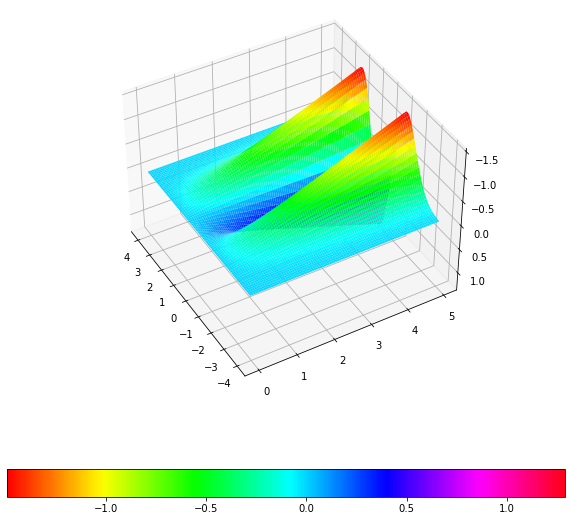

In [13]:
fig4 = plt.figure(figsize=(10,10))
ax4 = plt.axes(projection = '3d')

X, T = np.meshgrid(x, t)
surf = ax4.plot_surface(X, T, sol.T.real, cmap = cm.hsv, rstride=1, cstride=1)
fig4.colorbar(surf, orientation = 'horizontal')
ax4.view_init(-140, 30)


# ax4.set_title('Time evolution of the second mode', fontsize = 16)
# ax4.set_zlabel(r'$\psi_2$', fontsize=14, rotation = 90)
# ax4.set_xlabel(r'$x-value$', fontsize=14, rotation=60)
# ax4.set_ylabel(r'$time$', fontsize=14, rotation=60)

# fig4.savefig("-14030.pdf")

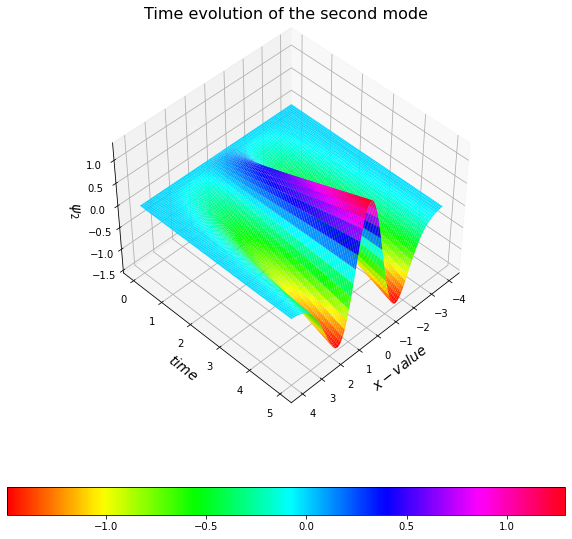

In [14]:
fig4 = plt.figure(figsize=(10,10))

ax4 = plt.axes(projection = '3d')

X, T = np.meshgrid(x, t)
surf = ax4.plot_surface(X, T, sol.T.real, cmap = cm.hsv, rstride=1, cstride=1)
fig4.colorbar(surf, orientation = 'horizontal')
ax4.view_init(45, 45)
# ax4.view_init(-140, 30)

ax4.set_title('Time evolution of the second mode', fontsize = 16)
ax4.set_zlabel(r'$\psi_2$', fontsize=14, rotation = 90)
ax4.set_xlabel(r'$x-value$', fontsize=14, rotation=60)
ax4.set_ylabel(r'$time$', fontsize=14, rotation=60)

fig4.savefig("-14030.pdf")

In [17]:
x

array([-4. , -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3. ,
       -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. , -1.9,
       -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8,
       -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,
        0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,
        1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,
        2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,
        3.7,  3.8,  3.9,  4. ])

In [20]:
t

array([0.        , 0.05050505, 0.1010101 , 0.15151515, 0.2020202 ,
       0.25252525, 0.3030303 , 0.35353535, 0.4040404 , 0.45454545,
       0.50505051, 0.55555556, 0.60606061, 0.65656566, 0.70707071,
       0.75757576, 0.80808081, 0.85858586, 0.90909091, 0.95959596,
       1.01010101, 1.06060606, 1.11111111, 1.16161616, 1.21212121,
       1.26262626, 1.31313131, 1.36363636, 1.41414141, 1.46464646,
       1.51515152, 1.56565657, 1.61616162, 1.66666667, 1.71717172,
       1.76767677, 1.81818182, 1.86868687, 1.91919192, 1.96969697,
       2.02020202, 2.07070707, 2.12121212, 2.17171717, 2.22222222,
       2.27272727, 2.32323232, 2.37373737, 2.42424242, 2.47474747,
       2.52525253, 2.57575758, 2.62626263, 2.67676768, 2.72727273,
       2.77777778, 2.82828283, 2.87878788, 2.92929293, 2.97979798,
       3.03030303, 3.08080808, 3.13131313, 3.18181818, 3.23232323,
       3.28282828, 3.33333333, 3.38383838, 3.43434343, 3.48484848,
       3.53535354, 3.58585859, 3.63636364, 3.68686869, 3.73737

In [25]:
T.shape

(100, 81)

In [24]:
X.shape

(100, 81)

In [29]:
sol

array([[-0.00000000e+00, -1.41424716e-04, -2.82849432e-04,
        -4.24274148e-04, -5.65698863e-04, -7.07123579e-04,
        -8.48548295e-04, -9.89973011e-04, -1.13139773e-03,
        -1.27282244e-03, -1.41424716e-03, -1.55567187e-03,
        -1.69709659e-03, -1.83852131e-03, -1.97994602e-03,
        -2.12137074e-03, -2.26279545e-03, -2.40422017e-03,
        -2.54564489e-03, -2.68706960e-03, -2.82849432e-03,
        -2.96991903e-03, -3.11134375e-03, -3.25276847e-03,
        -3.39419318e-03, -3.53561790e-03, -3.67704261e-03,
        -3.81846733e-03, -3.95989204e-03, -4.10131676e-03,
        -4.24274148e-03, -4.38416619e-03, -4.52559091e-03,
        -4.66701562e-03, -4.80844034e-03, -4.94986506e-03,
        -5.09128977e-03, -5.23271449e-03, -5.37413920e-03,
        -5.51556392e-03, -5.65698863e-03, -5.79841335e-03,
        -5.93983807e-03, -6.08126278e-03, -6.22268750e-03,
        -6.36411221e-03, -6.50553693e-03, -6.64696165e-03,
        -6.78838636e-03, -6.92981108e-03, -7.07123579e-0

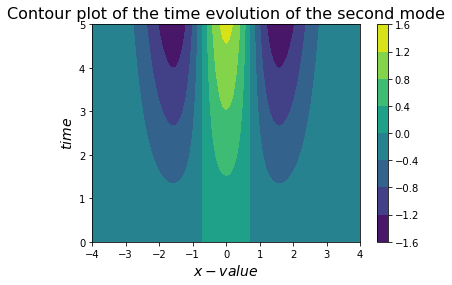

In [15]:
fig5, ax5 = plt.subplots()

X, T = np.meshgrid(x, t)
surf = ax5.contourf(X, T, sol.T.real)
fig5.colorbar(surf)

ax5.set_title('Contour plot of the time evolution of the second mode', fontsize = 16)
ax5.set_xlabel(r'$x-value$', fontsize=14)
ax5.set_ylabel(r'$time$', fontsize=14)

fig5.savefig("contour.pdf")

In [16]:
sol.T.shape

(100, 81)

In [17]:
X.shape

(100, 81)

In [18]:
T.shape

(100, 81)